8) 계층적 군집화

여러개의 군집중에서 유사도가 가장 높은 군집 2개를 선택하여 하나로 합치면서 군집수를 줄여가는 방법

처음에는 모든 군집이 하나의 데이터만을 가지고 군집을 합쳐가면서 최종적으로 하나의 군집만 남게 된다

모든 두 군집간의 거리를 계산

거리가 가장 가까운 것 2개를 묶음

하나의 군집으로 합쳐질 때까지 반복

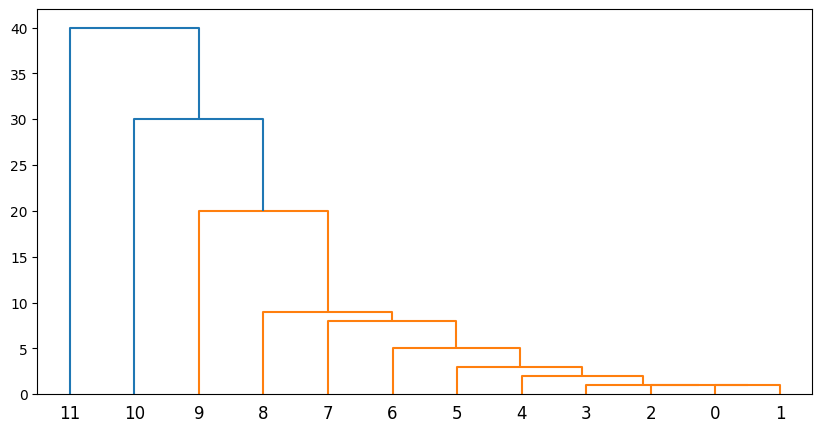

In [1]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
import numpy as np

X = np.array([[i] for i in [0,1,2,3,5,8,13,21,30,50,80,120]])
# 두 군집의 가장 가까운 샘플의 거리를 기준으로 계산
Z = linkage(X, 'single')
plt.figure(figsize=(10, 5))
dendrogram(Z) #dendro 나무(라틴어)
plt.show()
# leaf: 샘플의 인덱스
# leaf의 순서와 가로방향으로 얼마나 가까운지는 의미가 없고
# branch가 합쳐지는 순간의 세로축의 거리가 두 그룹의 유사도를 알려주는 척도

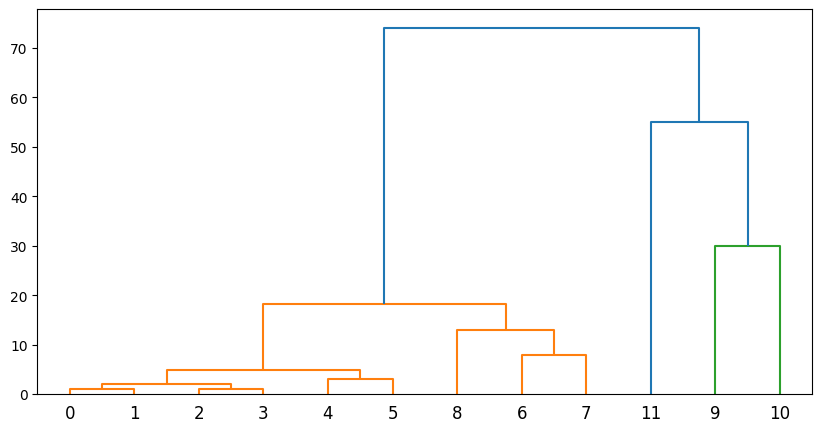

In [2]:
# 두 군집의 모든 데이터의 평균거리를 기준으로 구분
Z = linkage(X, 'average')
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.show()

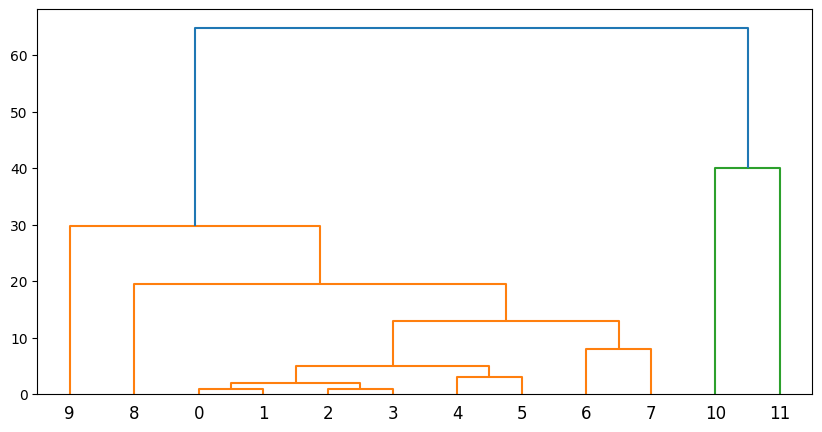

In [3]:
# 가중 거리 방식
# 군집a와 군집b를 합쳐서 군집 c를 만들었다면
# 군집c와 군집d의 거리는  a와 d의 거리, b와 d의 거리의 평균을 사용하는 방식
Z = linkage(X, 'weighted')
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.show()

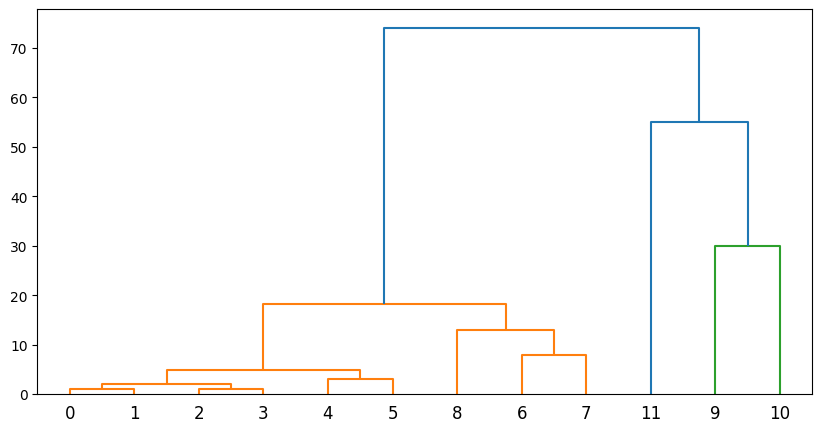

In [4]:
# 두 군집의 중심점의 거리를 기준으로 계산
Z = linkage(X, 'centroid')
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.show()

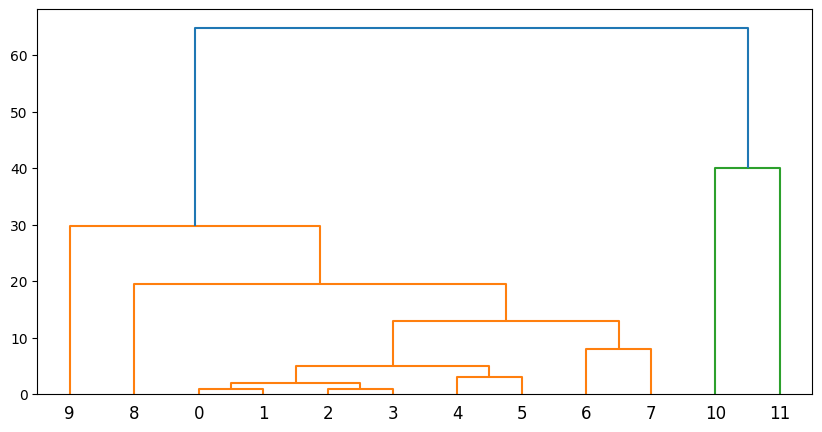

In [5]:
# 두 군집을 결합하여 새로운 군집을 만든 경우 두 군집의 중심점의 중앙값을 중심으로 계산
#군집의 모든 데이터와의 평균거리를 계산하는 방식보다 속도가 빠른 장점이 있음
Z = linkage(X, 'median')
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.show()

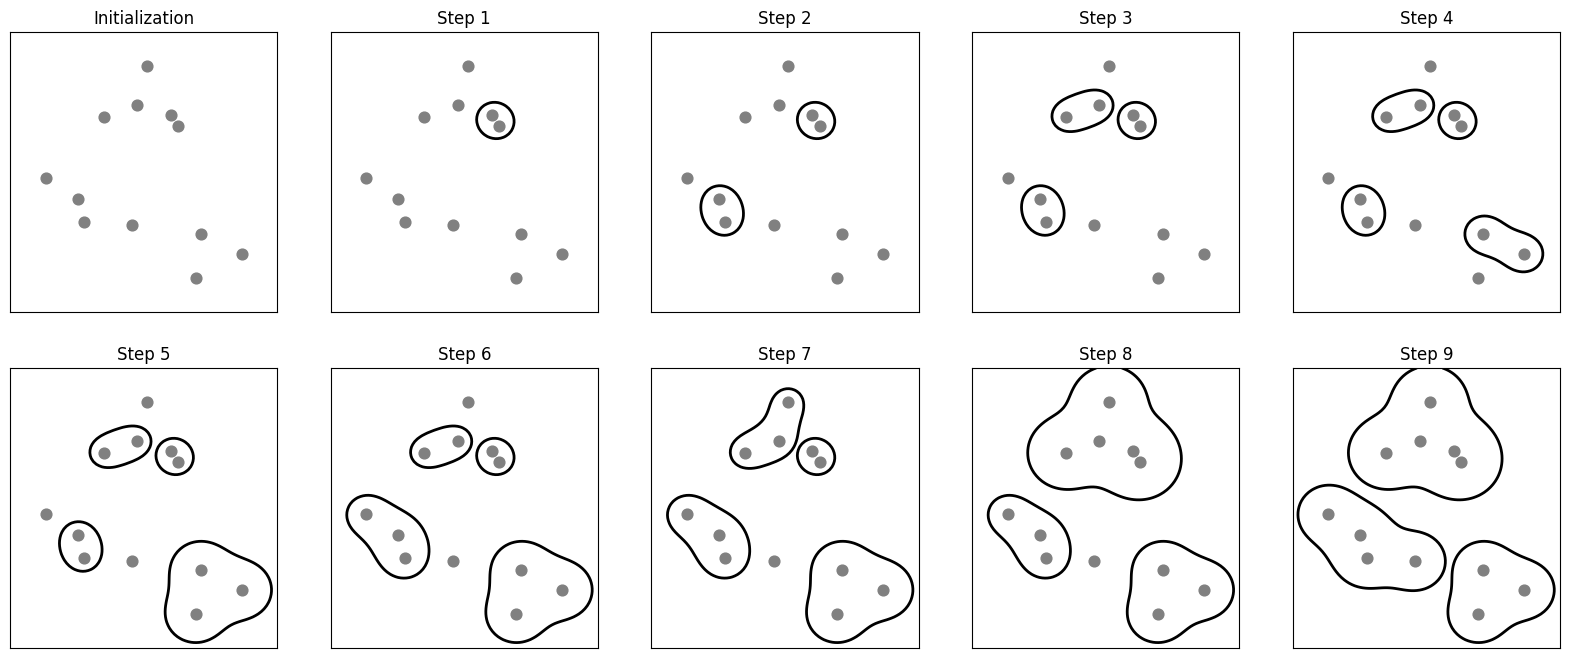

In [6]:
# 시작할 때 각 포인트를 하나의 클러스터로 지정하고 가장 비슷한 두 클러스터를 합치는 방식
import mglearn
mglearn.plots.plot_agglomerative_algorithm()

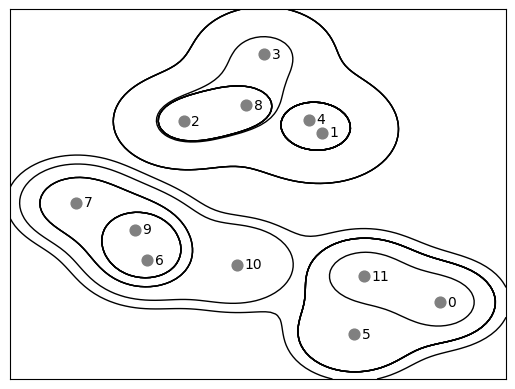

In [7]:
mglearn.plots.plot_agglomerative()

C:\Users\tjoeun\AppData\Local\Temp\ipykernel_1380\962483030.py:20: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x_0[:, 0], x_0[:, 1], cmap=mglearn.cm3)
C:\Users\tjoeun\AppData\Local\Temp\ipykernel_1380\962483030.py:21: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x_1[:, 0], x_1[:, 1], cmap=mglearn.cm3)
C:\Users\tjoeun\AppData\Local\Temp\ipykernel_1380\962483030.py:22: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x_2[:, 0], x_2[:, 1], cmap=mglearn.cm3)


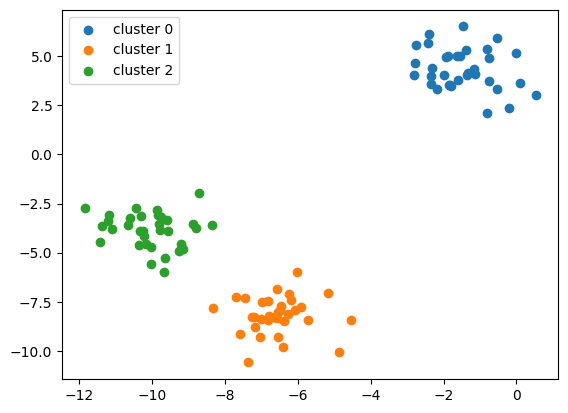

In [8]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs
import numpy as np

X, y = make_blobs(random_state=1)

agg = AgglomerativeClustering(n_clusters=3)
assign = agg.fit_predict(X)

# 배열 x 오른쪽에 열 한개 추가
a = assign.reshape(-1, 1)
x1 = np.hstack([X, a])

# 각 클래스별로 데이터 추출
x_0 = x1[x1[:, 2]==0, :]
x_1 = x1[x1[:, 2]==1, :]
x_2 = x1[x1[:, 2]==2, :]

# 시각화
plt.scatter(x_0[:, 0], x_0[:, 1], cmap=mglearn.cm3)
plt.scatter(x_1[:, 0], x_1[:, 1], cmap=mglearn.cm3)
plt.scatter(x_2[:, 0], x_2[:, 1], cmap=mglearn.cm3)
plt.legend(['cluster 0', 'cluster 1', 'cluster 2'], loc=2)
plt.show()

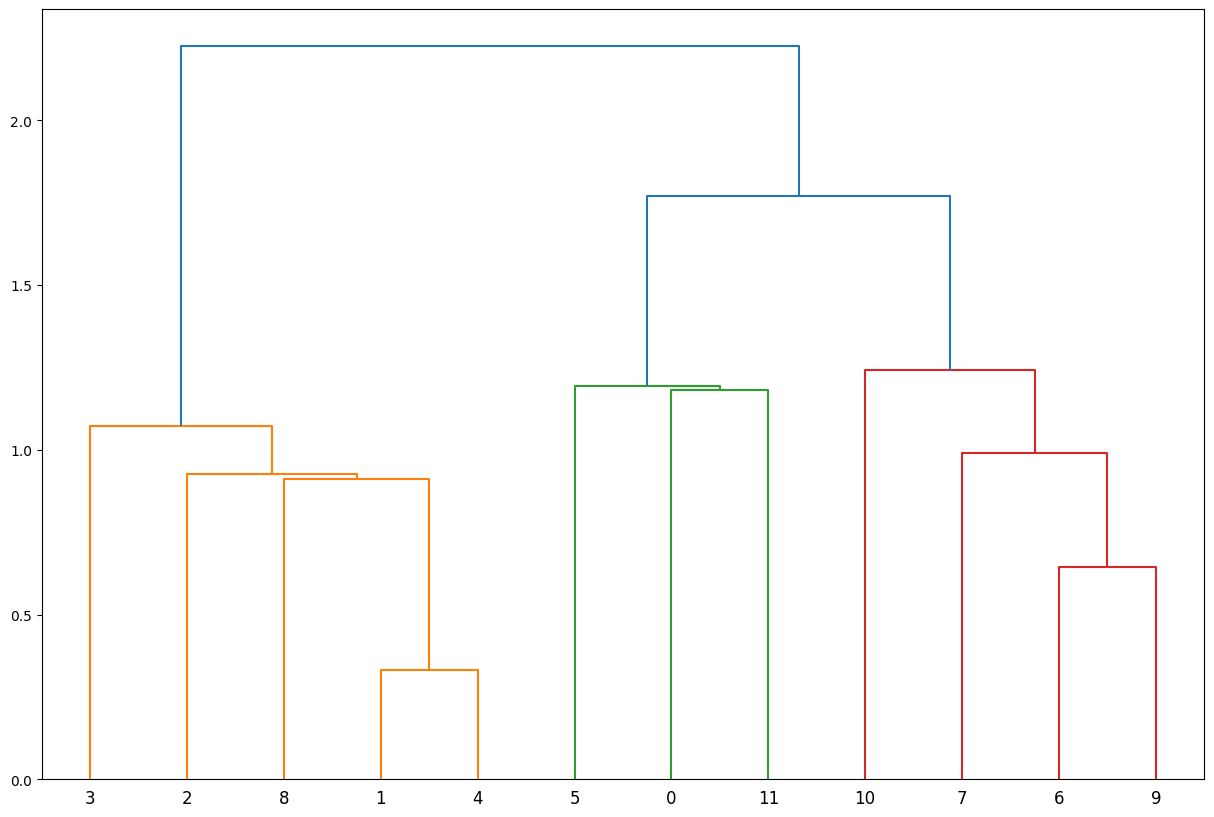

In [9]:
#위에서 만든 모형에 대한 이해를 하기 위하여 덴드로그램을 화면에 출력
from scipy.cluster.hierarchy import dendrogram, linkage

X, y = make_blobs(random_state=0, n_samples=12)

Z = linkage(X, 'single')
plt.figure(figsize=(15,10))
dendrogram(Z)
plt.show()